In [1]:
import pandas as pd
import numpy as np
import re, string, unicodedata
import nltk
# import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('train_40k.csv')
# data = df[:20000]
data = pd.DataFrame(data = df[:20000])
data.head(5)

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles


# EDA

In [3]:
data.dtypes

productId       object
Title           object
userId          object
Helpfulness     object
Score          float64
Time             int64
Text            object
Cat1            object
Cat2            object
Cat3            object
dtype: object

In [4]:
# To check if any nan values are present
data.isna().sum()

productId      0
Title          9
userId         0
Helpfulness    0
Score          0
Time           0
Text           0
Cat1           0
Cat2           0
Cat3           0
dtype: int64

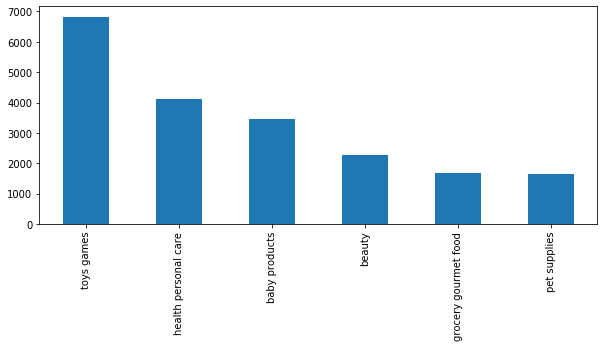

In [5]:
# Distribution of product categories 
%matplotlib inline
data['Cat1'].value_counts(normalize=False).plot(kind='bar', figsize=(10, 4))

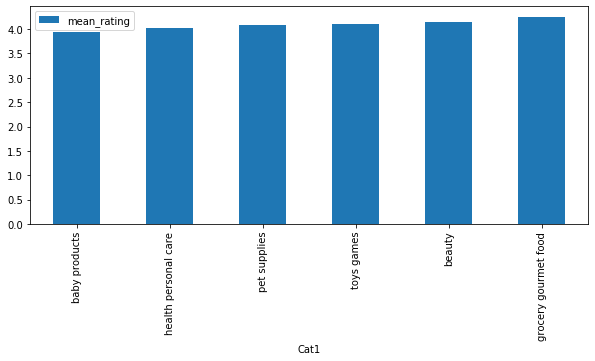

In [6]:
# Average ratings for each of these product categories
avg_rating = data.groupby('Cat1').agg(mean_rating=('Score', 'mean')) 
avg_rating.sort_values('mean_rating').plot(kind='bar', figsize=(10, 4))

In [7]:
data.Cat2.nunique()

64

In [8]:
data.Cat3.nunique()

422

In [9]:
data.productId.nunique()

11829

In [10]:
data.userId.nunique()

17291

# Text Preprocessing

In [11]:
# Converting text into lowercase
def to_lowercase(text):
    new_words = ''
    for word in text:
        new_word = word.lower()
        new_words += new_word
    return new_words

data["Text"] = data["Text"].apply(lambda text: to_lowercase(text))
# data.head()  

In [12]:
# Removing punctuation from the texts
def remove_punctuation(text):
    new_words = ''
    for word in text:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
              new_words += new_word
    return new_words

data["Text"] = data["Text"].apply(lambda text: remove_punctuation(text))
# data.head()  

In [13]:
# Getting rid of stop words
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in set(stopwords.words('english'))])

data["Text"] = data["Text"].apply(lambda text: remove_stopwords(text))
data.head()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,description photo product needs changed indica...,grocery gourmet food,meat poultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,great book well thought easily imagine events ...,toys games,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,first year teacher teaching 5th grade special ...,toys games,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,got book bookfair school looking something sum...,toys games,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,hi im martine redman created puzzle briarpatch...,toys games,puzzles,jigsaw puzzles


In [14]:
# Getting rid of unknown users
indexNames = data[data['userId'] == 'unknown' ].index
data.drop(indexNames , inplace=True)

In [15]:
# Creating product dataframe
product_data = pd.DataFrame(data,columns=['productId','Title','Cat1','Cat2','Cat3'])
product_data['Title'] = product_data['Title'].fillna('NA')

In [16]:
# Creating user dataframe
user_data = pd.DataFrame(data,columns=['userId','Text'])
user_data.head()

,userId,Text
0,A3MQDNGHDJU4MK,description photo product needs changed indica...
51,AL91D1BD8J3WG,ive used batteries entire life everything smok...
88,A2AXQTB83VMK4L,easy enough learn get child pokemon still game...
105,A1048CYU0OV4O8,one movie movie collection filled comedy actio...
220,A2VEX3YDK12LWE,one ofthe best ever heard naturetype new age m...


In [17]:
# Creating a userID dataframe 
data_index = pd.DataFrame(data,columns=['userId'])
data_index.index.name = 'index'

In [18]:
# Combining all the columns of product data except productId
product_data['product_text'] = product_data['Cat1']

In [19]:
# Cleaning the product_text column
product_data["product_text"] = product_data["product_text"].apply(lambda text: to_lowercase(text))
product_data["product_text"] = product_data["product_text"].apply(lambda text: remove_punctuation(text))
product_data["product_text"] = product_data["product_text"].apply(lambda text: remove_stopwords(text))
product_data.head()

,productId,Title,Cat1,Cat2,Cat3,product_text
index,,,,,,
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,grocery gourmet food,meat poultry,jerky,grocery gourmet food
51,B00000JHQ0,Duracell MN2400B2 AAA Alkaline Batteries (Pair),health personal care,household supplies,household batteries,health personal care
88,B00000IWGB,Pokemon Master Trainer 2001,toys games,games,board games,toys games
105,B00004CI84,Beetle Juice [VHS] (1988),grocery gourmet food,beverages,juices,grocery gourmet food
220,B0000017QZ,Forest Rain,health personal care,health care,stress reduction,health personal care


# Using tf-Idf

In [20]:
# fitting and transforming the vector
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_userid = tfidf_vectorizer.fit_transform((user_data['Text'])) 
tfidf_userid

<18109x46835 sparse matrix of type '<class 'numpy.float64'>'
	with 646535 stored elements in Compressed Sparse Row format>

In [21]:
# Determining the user similarity using tf-idf

from sklearn.metrics.pairwise import linear_kernel
user_ids = []
# similarity_score = []
cosine_similarities = linear_kernel(tfidf_userid[0:1], tfidf_userid).flatten()
similarity_score = pd.DataFrame(data = cosine_similarities,columns=['similarity_score'])

similarity_score.index.name = 'index'
similarity_score['Target_userid'] = 'A3MQDNGHDJU4MK'

# similar_movies_set = pd.merge(movie_sim1,movies_set,on='movieId')
similarity_score = similarity_score.nlargest(10,'similarity_score')
similarity_score = pd.merge(data_index,similarity_score,on='index')
similarity_score = similarity_score.set_index(['Target_userid'])

similarity_score.head(10)

,userId,similarity_score
Target_userid,,
A3MQDNGHDJU4MK,A3MQDNGHDJU4MK,1.000000
A3MQDNGHDJU4MK,A2WFPXW7SZRO7E,0.278728
A3MQDNGHDJU4MK,A17ZMCYTC61SVI,0.332948
A3MQDNGHDJU4MK,AMMWXVR95HRTK,0.275149
A3MQDNGHDJU4MK,A2TC1JFZN54TKB,0.309970
A3MQDNGHDJU4MK,A2CKO9HKCD063N,0.288749
A3MQDNGHDJU4MK,A3UIZ66QDFHSAB,0.283539
A3MQDNGHDJU4MK,A3JXE7KEMIJFBO,0.233996
A3MQDNGHDJU4MK,A2I18AO597DSDI,0.323607


# Using KNN

In [22]:
from sklearn.neighbors import NearestNeighbors
n_neighbors = 10
KNN = NearestNeighbors(n_neighbors,metric = 'cosine', algorithm = 'brute')
KNN.fit(tfidf_userid)
NNs = KNN.kneighbors(tfidf_userid, return_distance=True)

In [23]:
# Determining the user similarity using KNN

top = NNs[1][0][1:]
index_score = NNs[0][0][1:]
similarity_score = pd.DataFrame(data = top)
user_ids = pd.DataFrame(data = index_score)
user_sim = pd.concat([similarity_score.reindex(similarity_score.index),user_ids], axis=1)
user_sim['Target_user'] = 'A2L6QTQQI13LZG' 
user_sim.columns = ['index','sim_score','Target_user']
user_sim = pd.merge(data_index,user_sim,on='index')
user_sim = user_sim.set_index(['Target_user'])
user_sim = user_sim.drop(columns=['index'])
user_sim.head(10)
# len(index_score)

,userId,sim_score
Target_user,,
A2L6QTQQI13LZG,A2WFPXW7SZRO7E,0.721272
A2L6QTQQI13LZG,A17ZMCYTC61SVI,0.667052
A2L6QTQQI13LZG,AMMWXVR95HRTK,0.724851
A2L6QTQQI13LZG,A2TC1JFZN54TKB,0.690030
A2L6QTQQI13LZG,A2CKO9HKCD063N,0.711251
A2L6QTQQI13LZG,A3UIZ66QDFHSAB,0.716461
A2L6QTQQI13LZG,A3JXE7KEMIJFBO,0.766004
A2L6QTQQI13LZG,A2I18AO597DSDI,0.676393
A2L6QTQQI13LZG,A1B64OPBL06ZV9,0.768679


# User similarity based on product data

## tf-idf

In [24]:
# Selecting a product id
u = 'B000E46LYG'
index = np.where(product_data['productId'] == u)[0][0]
product_sel = product_data.iloc[[index]]
# product_sel

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
product_tfidf = tfidf_vectorizer.transform(product_sel['product_text'])
cosine_similarity_tfidf = map(lambda x: cosine_similarity(product_tfidf, x),tfidf_userid)
final = list(cosine_similarity_tfidf)

In [26]:
highest =  sorted(range(len(final)), key=lambda i: final[i], reverse=True)[:10]
scores = [final[i][0][0] for i in highest]

user_id = pd.DataFrame(data = highest)
sim_scores = pd.DataFrame(data = scores)

user_sim = pd.concat([user_id.reindex(user_id.index),sim_scores], axis=1)
user_sim['Target_product_id'] = 'B000E46LYG' 
user_sim.columns = ['index','sim_score','Target_product_id']
user_sim = pd.merge(data_index,user_sim,on='index')
user_sim = user_sim.set_index(['Target_product_id'])
user_sim = user_sim.drop(columns=['index'])

user_sim.head(10)

,userId,sim_score
Target_product_id,,
B000E46LYG,A27DS4Y8BPRGHU,0.203538
B000E46LYG,A2CCK0VGMS547G,0.259258
B000E46LYG,A1KQOTF1C1D1V,0.240367
B000E46LYG,A1GENG7GVHB29W,0.243996
B000E46LYG,A3BOW4X2M7LRW6,0.223317
B000E46LYG,ACVMBJFPUFJLS,0.243379
B000E46LYG,A11LZJSJ67IAB2,0.211989
B000E46LYG,A3KS7Z8KA1KOTE,0.234812
B000E46LYG,AU5777PSJO8WQ,0.232943


## Count vectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

#fitting and transforming the vector
count_userid = count_vectorizer.fit_transform((user_data['Text'])) 

count_userid

<18109x46835 sparse matrix of type '<class 'numpy.int64'>'
	with 646535 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

product_vec = count_vectorizer.transform(product_sel['product_text'])
cosine_similarity_countv = map(lambda x: cosine_similarity(product_vec, x),count_userid)

final_1 = list(cosine_similarity_countv)

In [29]:
highest = sorted(range(len(final_1)), key=lambda i: final_1[i], reverse=True)[:10]
scores = [final_1[i][0][0] for i in highest]

user_id = pd.DataFrame(data = highest)
sim_scores = pd.DataFrame(data = scores)

user_sim = pd.concat([user_id.reindex(user_id.index),sim_scores], axis=1)
user_sim['Target_product_id'] = 'B000E46LYG' 
user_sim.columns = ['index','sim_score','Target_product_id']
user_sim = pd.merge(data_index,user_sim,on='index')
user_sim = user_sim.set_index(['Target_product_id'])
user_sim = user_sim.drop(columns=['index'])


user_sim.head(10)

,userId,sim_score
Target_product_id,,
B000E46LYG,A1WEGU35F3JPUD,0.280976
B000E46LYG,A3IUDWDKA2G1KO,0.264906
B000E46LYG,A1KQOTF1C1D1V,0.309298
B000E46LYG,A3NUCFQJOWDYWH,0.268028
B000E46LYG,A33A5KMU2XFPO2,0.293294
B000E46LYG,A244A262RZD99L,0.264906
B000E46LYG,A1WNA1MRESBUZ6,0.284747
B000E46LYG,A3OXRYNHGH4OA1,0.268028
B000E46LYG,A3KS7Z8KA1KOTE,0.314485


## KNN

In [30]:
from sklearn.neighbors import NearestNeighbors
n_neighbors = 10

KNN = NearestNeighbors(n_neighbors,metric = 'cosine', algorithm = 'brute')
KNN.fit(tfidf_userid)
NNs = KNN.kneighbors(product_tfidf, return_distance=True)

In [31]:
top = NNs[1][0][1:]
index_score = NNs[0][0][1:]

similarity_score = pd.DataFrame(data = top)
user_ids = pd.DataFrame(data = index_score)

user_sim = pd.concat([similarity_score.reindex(similarity_score.index),user_ids], axis=1)
user_sim['Target_product_id'] = 'B000E46LYG' 
user_sim.columns = ['index','sim_score','Target_product_id']
user_sim = pd.merge(data_index,user_sim,on='index')
user_sim = user_sim.set_index(['Target_product_id'])
user_sim = user_sim.drop(columns=['index'])

user_sim.head(10)

,userId,sim_score
Target_product_id,,
B000E46LYG,A27DS4Y8BPRGHU,0.796462
B000E46LYG,A1KQOTF1C1D1V,0.759633
B000E46LYG,A1GENG7GVHB29W,0.756004
B000E46LYG,A3BOW4X2M7LRW6,0.776683
B000E46LYG,ACVMBJFPUFJLS,0.756621
B000E46LYG,A11LZJSJ67IAB2,0.788011
B000E46LYG,A3KS7Z8KA1KOTE,0.765188
B000E46LYG,AU5777PSJO8WQ,0.767057
B000E46LYG,AONT4LVMGIQYV,0.782150


# Multi label text classification

In [32]:
# pip install tensorflow

In [33]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM,Bidirectional
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

# import keras
# from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import Embedding
# from keras.layers import Flatten
from keras.layers import Conv1D
from keras.optimizers import adam

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [34]:
classify_data = pd.DataFrame(data=data,columns=['Text','Cat1'])
classify_data.head(5)

,Text,Cat1
index,,
0,description photo product needs changed indica...,grocery gourmet food
51,ive used batteries entire life everything smok...,health personal care
88,easy enough learn get child pokemon still game...,toys games
105,one movie movie collection filled comedy actio...,grocery gourmet food
220,one ofthe best ever heard naturetype new age m...,health personal care


In [35]:
# sentences = []
X = classify_data['Text']
# len(X)

In [36]:
# label encoding the categories
scale_mapper = {'pet supplies':1,'health personal care':2,'grocery gourmet food':3,'toys games':4,'beauty':5,'baby products':6}
classify_data['Cat1_encoded'] = classify_data['Cat1'].replace(scale_mapper)

In [37]:
# y = pd.get_dummies(classify_data['Cat1_encoded']).values
y = classify_data['Cat1_encoded']
y.shape

(18109,)

In [38]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape

(12676,)

# Naive bayes

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_df=0.5)
count_vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.5, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [40]:
# X_train_cv = count_vectorizer.transform(X_train)
X_train_cv = count_vectorizer.fit_transform(X_train)
X_test_cv = count_vectorizer.transform(X_test)

In [41]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# 2. instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train_cv, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test_cv)
print('Testing accuracy: ',metrics.accuracy_score(y_test, y_pred))

Testing accuracy:  0.8177802319160685


# Keras sequential model

In [42]:
# Checking the input length
input_lengths = [len(word_tokenize(x)) for x in X]
sort = sorted(input_lengths)  #sorted lengths
maxLength =sort[len(sort)-1]
print("max input length is: ",maxLength)

max input length is:  610


In [43]:
maxLength = sort[int(len(sort) * 0.70)]
print("70% cover input sequence length up to",maxLength)

70% cover input sequence length up to 48


In [44]:
# Creating dataframe containing product category and user text
classify_data = pd.DataFrame(data=data,columns=['Text','Cat1'])

In [45]:
X = classify_data['Text']

In [46]:
# label encoding the categories
scale_mapper = {'pet supplies':1,'health personal care':2,'grocery gourmet food':3,'toys games':4,'beauty':5,'baby products':6}
classify_data['Cat1_encoded'] = classify_data['Cat1'].replace(scale_mapper)
y = pd.get_dummies(classify_data['Cat1_encoded']).values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape

(12676,)

In [48]:
tokenizer = Tokenizer(num_words=200)
tokenizer.fit_on_texts(X)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size =200

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_test = pad_sequences(X_test, padding='post', maxlen=100)

In [49]:
model = Sequential()
model.add(Embedding(vocab_size,100, input_length=100))
model.add(Flatten())
model.add(Dense(100, activation='relu',input_dim=100))
# model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [50]:
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.2)
model.summary()

/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10140 samples, validate on 2536 samples
Epoch 1/10
10140/10140 [==============================] - 3s 252us/step - loss: 0.3666 - accuracy: 0.8543 - val_loss: 0.3175 - val_accuracy: 0.8688
Epoch 2/10
10140/10140 [==============================] - 2s 207us/step - loss: 0.2831 - accuracy: 0.8835 - val_loss: 0.2768 - val_accuracy: 0.8893
Epoch 3/10
10140/10140 [==============================] - 2s 208us/step - loss: 0.2412 - accuracy: 0.9033 - val_loss: 0.2790 - val_accuracy: 0.8876
Epoch 4/10
10140/10140 [==============================] - 2s 226us/step - loss: 0.2152 - accuracy: 0.9149 - val_loss: 0.2877 - val_accuracy: 0.8845
Epoch 5/10
10140/10140 [==============================] - 2s 245us/step - loss: 0.1911 - accuracy: 0.9255 - val_loss: 0.3007 - val_accuracy: 0.8830
Epoch 6/10
10140/10140 [==============================] - 2s 234us/step - loss: 0.1688 - accuracy: 0.9352 - val_loss: 0.3205 - val_accuracy: 0.8776
Epoch 7/10
10140/10140 [==============================] - 2s 21

# CNN

In [51]:
# sentences = []
X = classify_data['Text']

In [52]:
y = pd.get_dummies(classify_data['Cat1_encoded']).values
# y = classify_data['Cat1_encoded'].values
y.shape

(18109, 6)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape

(12676,)

In [54]:
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(X)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size =500

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_test = pad_sequences(X_test, padding='post', maxlen=100)

In [55]:
filters = 250
kernel_size = 3
hidden_dims = 100

model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(vocab_size,
                    100,
                    input_length=maxlen))
model.add(Dropout(0.2))
# binary_crossentropy
# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(X_test, y_test))
model.summary()

Train on 12676 samples, validate on 5433 samples
Epoch 1/10
12676/12676 [==============================] - 5s 377us/step - loss: 0.4226 - accuracy: 0.8406 - val_loss: 0.3166 - val_accuracy: 0.8750
Epoch 2/10
12676/12676 [==============================] - 4s 335us/step - loss: 0.2694 - accuracy: 0.8931 - val_loss: 0.2219 - val_accuracy: 0.9134
Epoch 3/10
12676/12676 [==============================] - 4s 337us/step - loss: 0.2180 - accuracy: 0.9160 - val_loss: 0.2111 - val_accuracy: 0.9169
Epoch 4/10
12676/12676 [==============================] - 4s 336us/step - loss: 0.2038 - accuracy: 0.9205 - val_loss: 0.2087 - val_accuracy: 0.9167
Epoch 5/10
12676/12676 [==============================] - 4s 338us/step - loss: 0.1933 - accuracy: 0.9249 - val_loss: 0.2057 - val_accuracy: 0.9195
Epoch 6/10
12676/12676 [==============================] - 4s 338us/step - loss: 0.1827 - accuracy: 0.9291 - val_loss: 0.2074 - val_accuracy: 0.9182
Epoch 7/10
12676/12676 [==============================] - 5s 36

# LSTM (RNN)

In [56]:
# sentences = []
X = classify_data['Text']

In [57]:
y = pd.get_dummies(classify_data['Cat1_encoded']).values
# y = classify_data['Cat1_encoded'].values
y.shape

(18109, 6)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape

(12676,)

In [59]:
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(X)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size =500

maxlen = 50

X_train = pad_sequences(X_train, padding='post', maxlen=50)
X_test = pad_sequences(X_test, padding='post', maxlen=50)

In [62]:
model = Sequential()
model.add(Embedding(vocab_size, 256, input_length=50))
# model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256)))
model.add(Dropout(0.2))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())
model.fit(X_train, y_train, epochs=10, batch_size=64)
model.summary()
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
12676/12676 [==============================] - 42s 3ms/step - loss: 0.3431 - accuracy: 0.8642
Epoch 2/10
12676/12676 [==============================] - 45s 4ms/step - loss: 0.2226 - accuracy: 0.9142
Epoch 3/10
12676/12676 [==============================] - 41s 3ms/step - loss: 0.2036 - accuracy: 0.9221
Epoch 4/10
12676/12676 [==============================] - 40s 3ms/step - loss: 0.1943 - accuracy: 0.9250
Epoch 5/10
12676/12676 [==============================] - 42s 3ms/step - loss: 0.1876 - accuracy: 0.9274
Epoch 6/10
12676/12676 [==============================] - 42s 3ms/step - loss: 0.1814 - accuracy: 0.9298
Epoch 7/10
12676/12676 [==============================] - 45s 4ms/step - loss: 0.1782 - accuracy: 0.9311
Epoch 8/10
12676/12676 [==============================] - 42s 3ms/step - loss: 0.1758 - accuracy: 0.9319
Epoch 9/10
12676/12676 [==============================] - 44s 3ms/step - loss: 0.1694 - accuracy: 0.9347
Epoch 10/10
12676/12676 [==============================